# Problem 1

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.optim as optim

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)
t_un = 0.1 * t_u

In [2]:
def model_lin(t_u, w1, b):
    return w1 * t_u + b

In [3]:
def model_exp(t_u, w1, w2, b):
    return w2*t_u**2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [6]:
def dmodel_dw1(t_u):
    return t_u

In [7]:
def dmodel_dw2(t_u):
    return t_u**2

In [8]:
def dmodel_db():
    return 1

In [9]:
def grad_fn_exp(t_u, t_c, t_p):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u)
    dloss_db = dloss_dtp * 1
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

In [10]:
def grad_fn_lin(t_u, t_c, t_p, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u)
    dloss_db = dloss_dtp * 1
    return torch.stack([dloss_dw1.sum(), dloss_db.sum()])

In [11]:
def training_loop_exp(n_epochs, learning_rate, params, t_u, t_c):
    loss_history = []
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        
        t_p = model_exp(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn_exp(t_u, t_c, t_p)
        
        params = params - learning_rate * grad
        
        if epoch == 1 or epoch % 500 == 0:
            #print(f"Epoch {epoch}",f"Training Loss {loss_train}",f"Val Loss {loss_val}")
            loss_history.append(loss)
            print(f"Epoch {epoch}",f"Loss {loss}")
            print(f"Params {params}", f"Grad {grad}")
        
    return params
        

In [12]:
def training_loop_lin(n_epochs, learning_rate, params, t_u, t_c):
    loss_history = []
    for epoch in range(1, n_epochs+1):
        w1, b = params
        
        t_p = model_lin(t_u,w1,b)
        loss = loss_fn(t_p,t_c)
        grad = grad_fn_lin(t_u, t_c, t_p, w1, b)
        params = params - learning_rate * grad
        
        if epoch == 1 or epoch % 500 == 0:
            #print(f"Epoch {epoch}",f"Training Loss {loss_train}",f"Val Loss {loss_val}")
            loss_history.append(loss)
            print(f"Epoch {epoch}",f"Loss {loss}")
            print(f"Params {params}", f"Grad {grad}")
    return params

In [13]:
params_exp = training_loop_exp( 5000, .00000001, torch.tensor([ 1.0, 1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1 Loss 11709471.0
Params tensor([ 9.9638e-01,  7.6851e-01, -5.9642e-05]) Grad tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])
Epoch 500 Loss 203.53102111816406
Params tensor([ 9.8248e-01, -1.1382e-02, -3.2924e-04]) Grad tensor([347.5554,  -5.3817,  13.8407])
Epoch 1000 Loss 202.92962646484375
Params tensor([ 9.8075e-01, -1.1355e-02, -3.9839e-04]) Grad tensor([347.0313,  -5.3927,  13.8204])
Epoch 1500 Loss 202.32911682128906
Params tensor([ 9.7902e-01, -1.1328e-02, -4.6744e-04]) Grad tensor([346.5076,  -5.3793,  13.8000])
Epoch 2000 Loss 201.7295379638672
Params tensor([ 9.7729e-01, -1.1301e-02, -5.3639e-04]) Grad tensor([345.9839,  -5.3706,  13.7796])
Epoch 2500 Loss 201.13087463378906
Params tensor([ 9.7556e-01, -1.1274e-02, -6.0523e-04]) Grad tensor([345.4596,  -5.3944,  13.7593])
Epoch 3000 Loss 200.53306579589844
Params tensor([ 9.7383e-01, -1.1247e-02, -6.7398e-04]) Grad tensor([344.9360,  -5.3718,  13.7389])
Epoch 3500 Loss 199.9362335205078
Params tensor([ 9.7211e-01, -1.1220

In [14]:
params_lin = training_loop_lin( 5000, 1e-2, torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 1 Loss 80.36434173583984
Params tensor([1.7761, 0.1064]) Grad tensor([-77.6140, -10.6400])
Epoch 500 Loss 7.860115051269531
Params tensor([ 4.0443, -9.8133]) Grad tensor([-0.2252,  1.2748])
Epoch 1000 Loss 3.828537940979004
Params tensor([  4.8021, -14.1031]) Grad tensor([-0.0962,  0.5448])
Epoch 1500 Loss 3.092191219329834
Params tensor([  5.1260, -15.9365]) Grad tensor([-0.0411,  0.2328])
Epoch 2000 Loss 2.957697868347168
Params tensor([  5.2644, -16.7200]) Grad tensor([-0.0176,  0.0995])
Epoch 2500 Loss 2.933133840560913
Params tensor([  5.3236, -17.0549]) Grad tensor([-0.0075,  0.0425])
Epoch 3000 Loss 2.9286484718322754
Params tensor([  5.3489, -17.1980]) Grad tensor([-0.0032,  0.0182])
Epoch 3500 Loss 2.9278297424316406
Params tensor([  5.3597, -17.2591]) Grad tensor([-0.0014,  0.0078])
Epoch 4000 Loss 2.927680253982544
Params tensor([  5.3643, -17.2853]) Grad tensor([-0.0006,  0.0033])
Epoch 4500 Loss 2.9276506900787354
Params tensor([  5.3662, -17.2964]) Grad tensor([-0.0

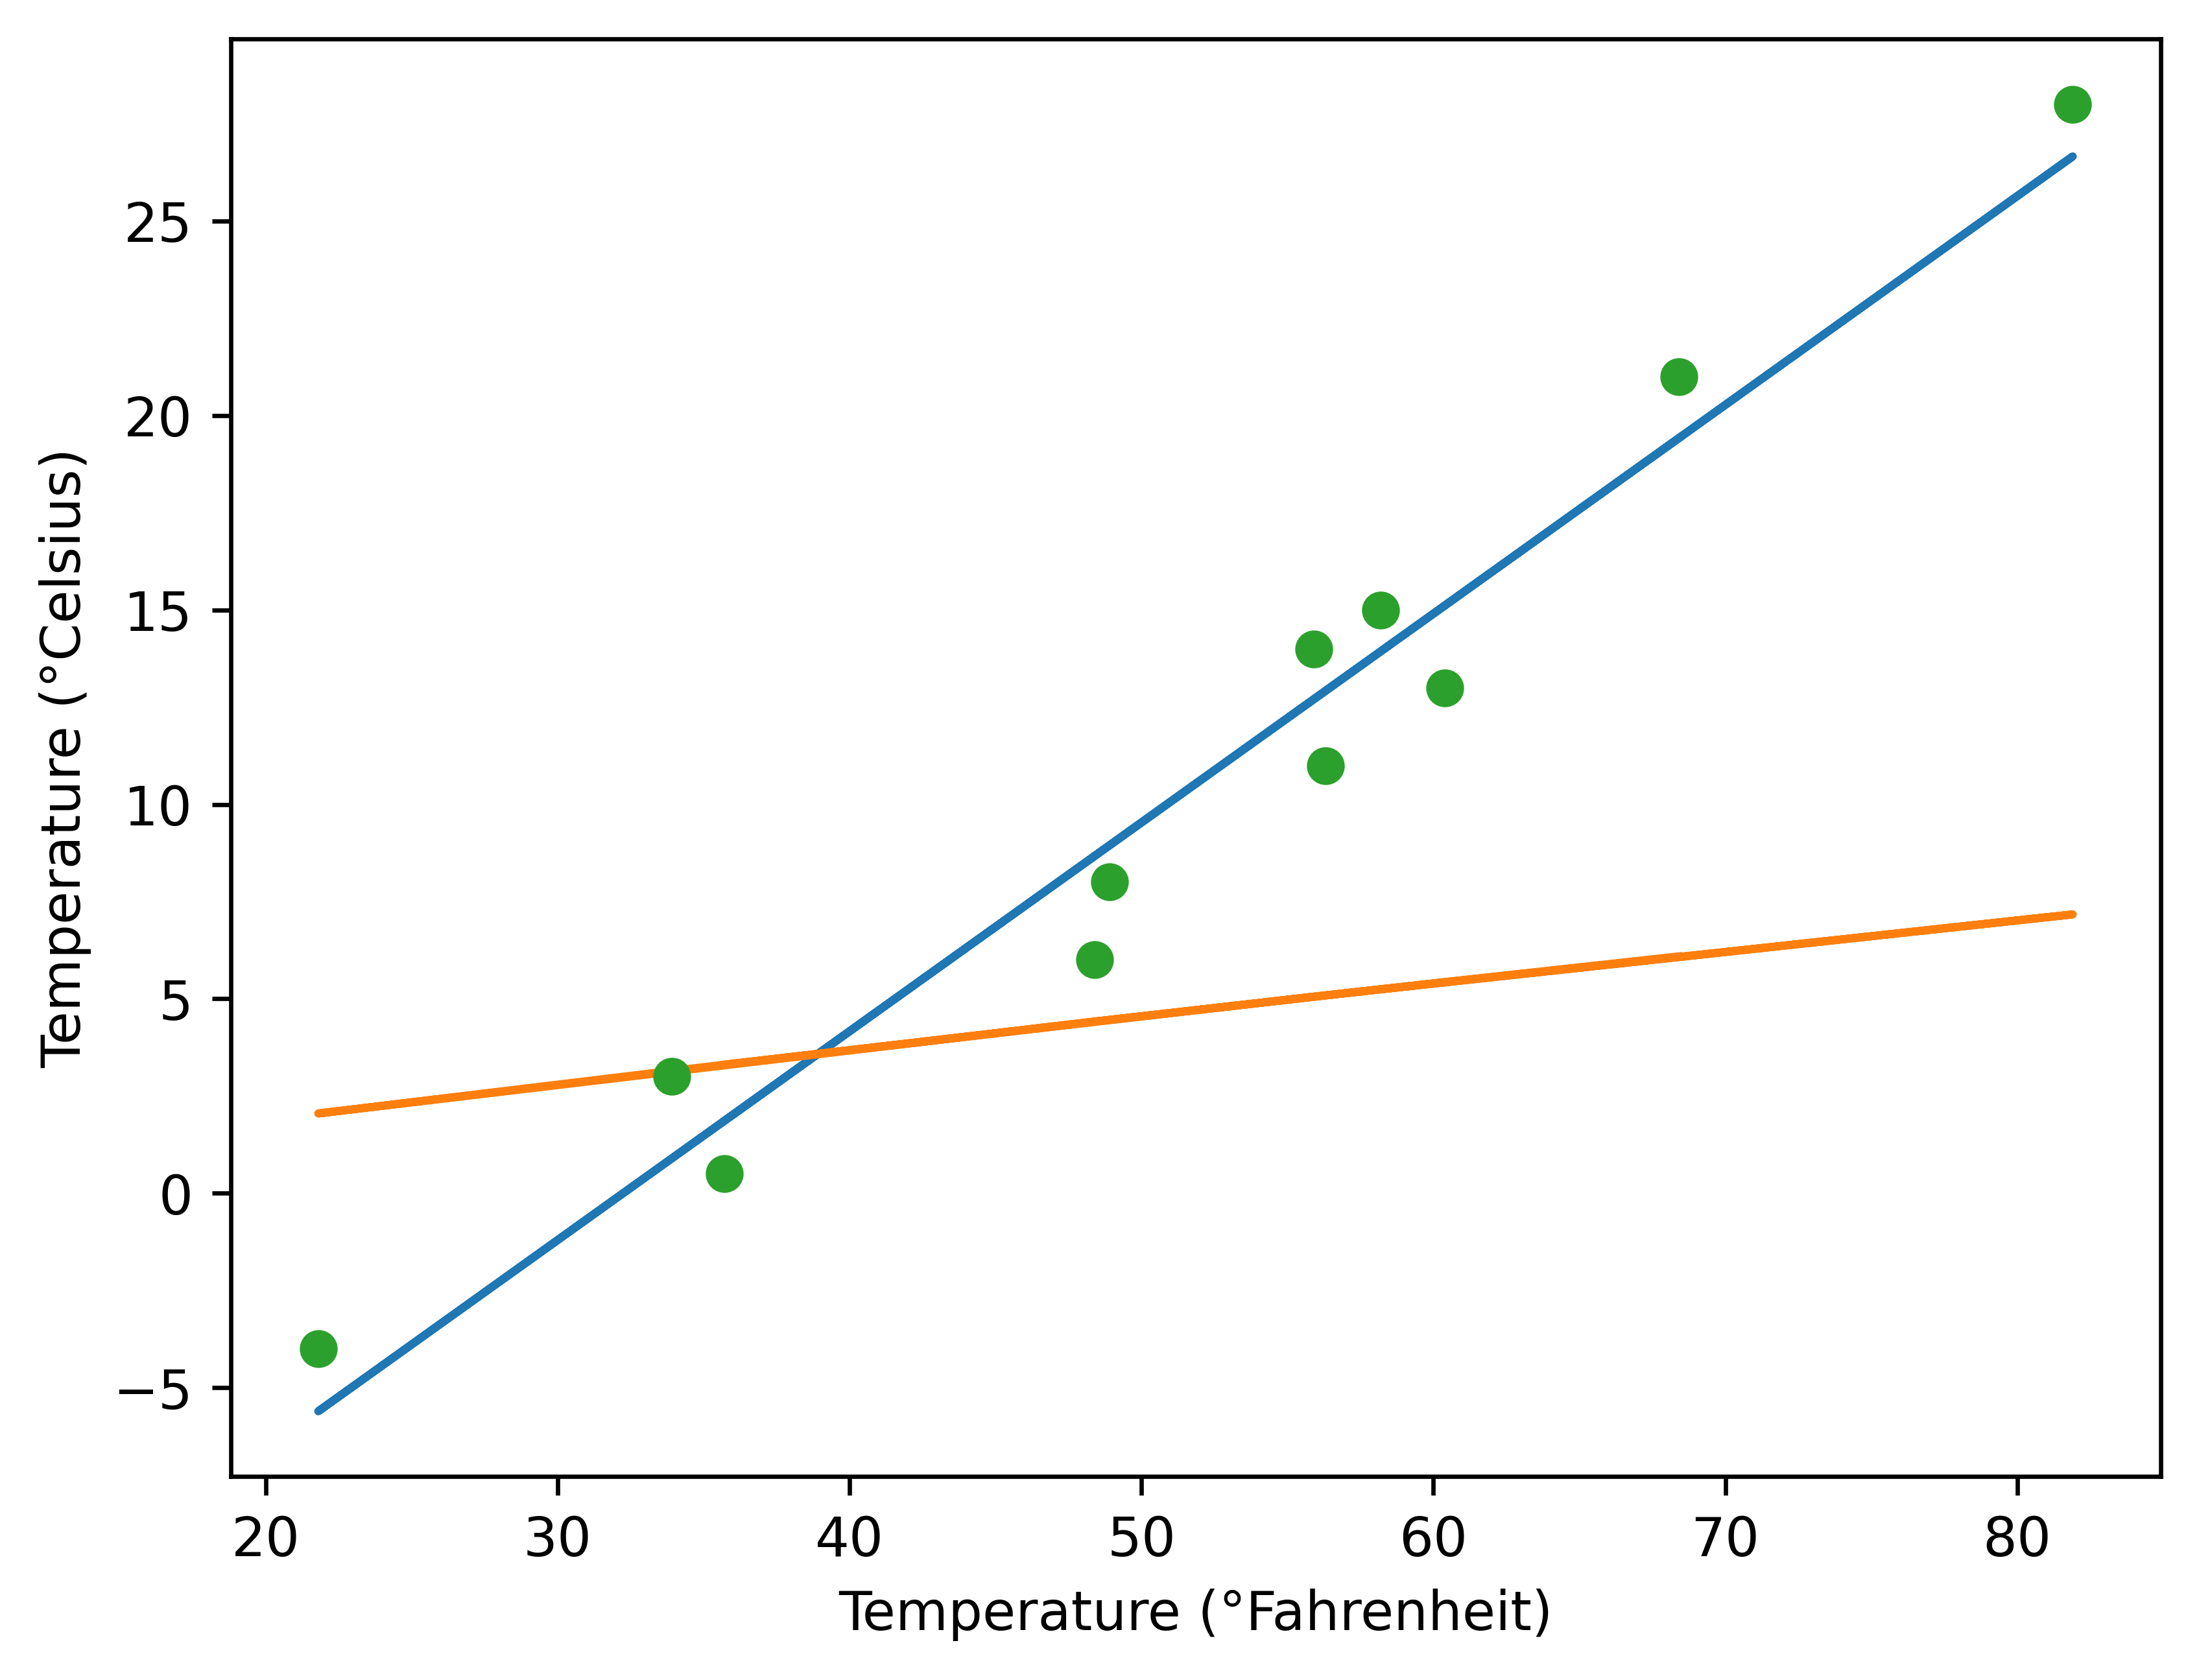

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p_lin = model_lin(t_un, *params_lin)  # <1>
t_p_exp = model_exp(t_un, *params_exp)  # <2>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p_lin.detach().numpy()) # <1>
plt.plot(t_u.numpy(), t_p_exp.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

# Problem 2

In [16]:
housing = pd.DataFrame(pd.read_csv("housing.csv"))

In [17]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [18]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
housing = housing[num_vars]
housing

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000
...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000
541,2400,3,1,1,0,1767150
542,3620,2,1,1,0,1750000
543,2910,3,1,1,0,1750000


In [19]:
housing_x = housing.values[:,:5]
housing_y = housing.values[:,-1]
print(type(housing_x))
print(housing_x)

<class 'numpy.ndarray'>
[[7420    4    2    3    2]
 [8960    4    4    4    3]
 [9960    3    2    2    2]
 ...
 [3620    2    1    1    0]
 [2910    3    1    1    0]
 [3850    3    1    2    0]]


In [20]:
t_u = torch.from_numpy(housing_x)
t_c = torch.from_numpy(housing_y)
print(t_u)

tensor([[7420,    4,    2,    3,    2],
        [8960,    4,    4,    4,    3],
        [9960,    3,    2,    2,    2],
        ...,
        [3620,    2,    1,    1,    0],
        [2910,    3,    1,    1,    0],
        [3850,    3,    1,    2,    0]])


In [21]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([538, 336, 115, 404, 509, 289, 208, 318, 506, 525, 301, 224, 353,  62,
         283, 219,  54,  61, 372, 369, 161,  24, 111, 133,  30, 313, 526, 166,
         220,  46, 192, 332, 337,  32, 460, 288, 223,  18, 260,  60,   5, 393,
         370, 418, 272, 531,  87,  88,  31, 510, 257, 209,  12, 180,  97, 368,
         240, 543, 102, 485,  66, 383, 233, 122, 296, 275, 107, 473, 392, 325,
         144, 158, 300, 277,  41, 119, 291,  43, 290, 226, 294,  20, 356, 523,
         452,  89, 150, 490, 136, 236, 464, 458, 469,  78, 467, 492, 293,  33,
          83, 168, 131, 185, 438, 375, 533, 434, 461, 352, 117, 306, 347, 483,
         212, 384, 134, 475, 145, 534, 270,  73,  27,  70,   0, 120, 542, 176,
         359, 544,  82, 114,  52, 282,   8,  15,   6, 344, 340,   9, 535, 273,
          56, 315,  95,  69, 331, 428, 436, 459, 292, 416, 518,   7, 425, 154,
         297, 381, 377, 269,  74,  71, 541, 507,  36, 494, 358, 281, 399, 205,
         239, 274, 169, 132, 237, 203, 413,  91, 339

In [22]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [26]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [38]:
def model_lin5(t_u, w5, w4, w3, w2, w1, b):
    return (w5 * t_u + w4 * t_u + w3 * t_u + w2 * t_u + w1 * t_u + b).sum()

In [45]:
def grad_fn_lin5(t_u, t_c, t_p, w5, w4, w3, w2, w1, b):
    dloss_dtp = loss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u)
    dloss_db = dloss_dtp * 1
    return torch.stack([dloss_dw1.sum(), dloss_dw1.sum(), dloss_dw1.sum(), dloss_dw1.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [46]:
def training_loop_lin5(n_epochs, learning_rate, params, t_u, t_c):
    loss_history = []
    for epoch in range(1, n_epochs+1):
        w5, w4, w3, w2, w1, b = params
        
        t_p = model_lin5(t_u, w5, w4, w3, w2, w1, b)
        print(t_p)
        loss = loss_fn(t_p,t_c)
        grad = grad_fn_lin5(t_u, t_c, t_p, w5, w4, w3, w2, w1, b)
        params = params - learning_rate * grad
        
        if epoch == 1 or epoch % 500 == 0:
            #print(f"Epoch {epoch}",f"Training Loss {loss_train}",f"Val Loss {loss_val}")
            loss_history.append(loss)
            print(f"Epoch {epoch}",f"Loss {loss}")
            print(f"Params {params}", f"Grad {grad}")
    return params

In [48]:
params_lin = training_loop_lin5( 5000, 1e-200, params, t_u = train_t_un, t_c = train_t_c)

tensor(1127321.5000, grad_fn=<SumBackward0>)
Epoch 1 Loss 16982423371776.0
Params tensor([1., 1., 1., 1., 1., 0.], grad_fn=<SubBackward0>) Grad tensor([3.8289e+18, 3.8289e+18, 3.8289e+18, 3.8289e+18, 3.8289e+18, 1.6982e+13],
       grad_fn=<StackBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, g

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
Epoch 1500

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(1127321.5000, grad_fn=<SumBackward0>)
tensor(112

# Problem 3

In [84]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [91]:
housing_x = housing.values[:,:5]
housing_y = housing.values[:,-1]
print(type(housing_x))
print(housing_x)

In [49]:
t_u = torch.from_numpy(housing_x)
t_c = torch.from_numpy(housing_y)
print(t_u)

tensor([[7420,    4,    2,    3,    2],
        [8960,    4,    4,    4,    3],
        [9960,    3,    2,    2,    2],
        ...,
        [3620,    2,    1,    1,    0],
        [2910,    3,    1,    1,    0],
        [3850,    3,    1,    2,    0]])


In [50]:
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

C:\Users\ikego\AppData\Local\Temp\ipykernel_23032\976833177.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_c = torch.tensor(t_c).unsqueeze(1) # <1>
C:\Users\ikego\AppData\Local\Temp\ipykernel_23032\976833177.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_u = torch.tensor(t_u).unsqueeze(1) # <1>


torch.Size([545, 1, 5])

In [51]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([  2,  67, 155,   8, 185,  80, 136, 196, 523, 457,  49, 265,  72,  78,
          29, 326,  83, 495, 329, 354, 474, 199, 117, 157, 376,  82, 479, 200,
          14, 512,  84, 123, 429, 142, 244, 351,   1, 470, 455, 318,  60, 156,
          18, 225, 337, 122, 395,  54, 239, 281,  37, 431, 243, 148, 526, 278,
         488, 399, 214, 162, 515, 251, 510, 188, 538, 442, 406, 327, 316, 365,
         436, 498, 454, 346, 267, 262, 290, 163, 342, 481, 264, 172, 263, 466,
          68, 174, 532, 179, 190, 284, 422, 343, 519, 175, 383, 270, 394, 101,
         183, 309, 439, 364, 426, 228, 315,  95,  90, 191, 177,  50, 374, 134,
          88,  30, 477,  58, 193, 150, 382, 242, 288, 320, 440,  85, 298, 125,
         347, 416,  66, 201, 377, 539, 388, 274, 206, 195, 353, 165,  64, 181,
          21, 391, 441, 275, 296, 116, 273, 170, 312, 392, 292, 240, 129, 213,
          98, 437, 338,  61, 415, 540,  75,  74, 140,  40, 370, 380, 525, 111,
         465, 204, 387,  42, 295, 187, 203, 452, 402

In [52]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [65]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [67]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([6, 2, 9, 7, 0, 8, 4, 5, 3]), tensor([ 1, 10]))

In [68]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [69]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[3.5793],
        [4.5974]], grad_fn=<AddmmBackward0>)

In [70]:
linear_model.weight

Parameter containing:
tensor([[0.8145]], requires_grad=True)

In [71]:
linear_model.bias

Parameter containing:
tensor([-0.9737], requires_grad=True)

In [72]:
x = torch.ones(1)
linear_model(x)

tensor([-0.1592], grad_fn=<AddBackward0>)

In [73]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592],
        [-0.1592]], grad_fn=<AddmmBackward0>)

In [74]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [75]:
linear_model.parameters()

<generator object Module.parameters at 0x000001A8D64C9200>

In [76]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.5927]], requires_grad=True),
 Parameter containing:
 tensor([-0.7627], requires_grad=True)]

In [77]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [78]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 118.2864, Validation loss 240.9257
Epoch 1000, Training loss 3.5384, Validation loss 5.4674
Epoch 2000, Training loss 2.9530, Validation loss 4.0974
Epoch 3000, Training loss 2.9415, Validation loss 3.9271

Parameter containing:
tensor([[5.2053]], requires_grad=True)
Parameter containing:
tensor([-16.8170], requires_grad=True)


In [79]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 191.7936, Validation loss 380.7298
Epoch 1000, Training loss 3.5629, Validation loss 5.5029
Epoch 2000, Training loss 2.9534, Validation loss 4.1015
Epoch 3000, Training loss 2.9416, Validation loss 3.9276

Parameter containing:
tensor([[5.2051]], requires_grad=True)
Parameter containing:
tensor([-16.8160], requires_grad=True)


In [80]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [81]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [82]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [83]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [84]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [85]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2197], requires_grad=True)

In [86]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 178.2616, Validation loss 356.5734
Epoch 1000, Training loss 6.5493, Validation loss 5.6892
Epoch 2000, Training loss 4.4686, Validation loss 11.5261
Epoch 3000, Training loss 2.3172, Validation loss 5.7764
Epoch 4000, Training loss 1.7754, Validation loss 3.3977
Epoch 5000, Training loss 1.6576, Validation loss 3.4900
output tensor([[11.4911],
        [20.1717]], grad_fn=<AddmmBackward0>)
answer tensor([[14.],
        [21.]])
hidden tensor([[-0.0102],
        [-0.0061],
        [ 0.0019],
        [-0.0140],
        [-0.0220],
        [ 0.0008],
        [ 0.0066],
        [ 0.0122]])


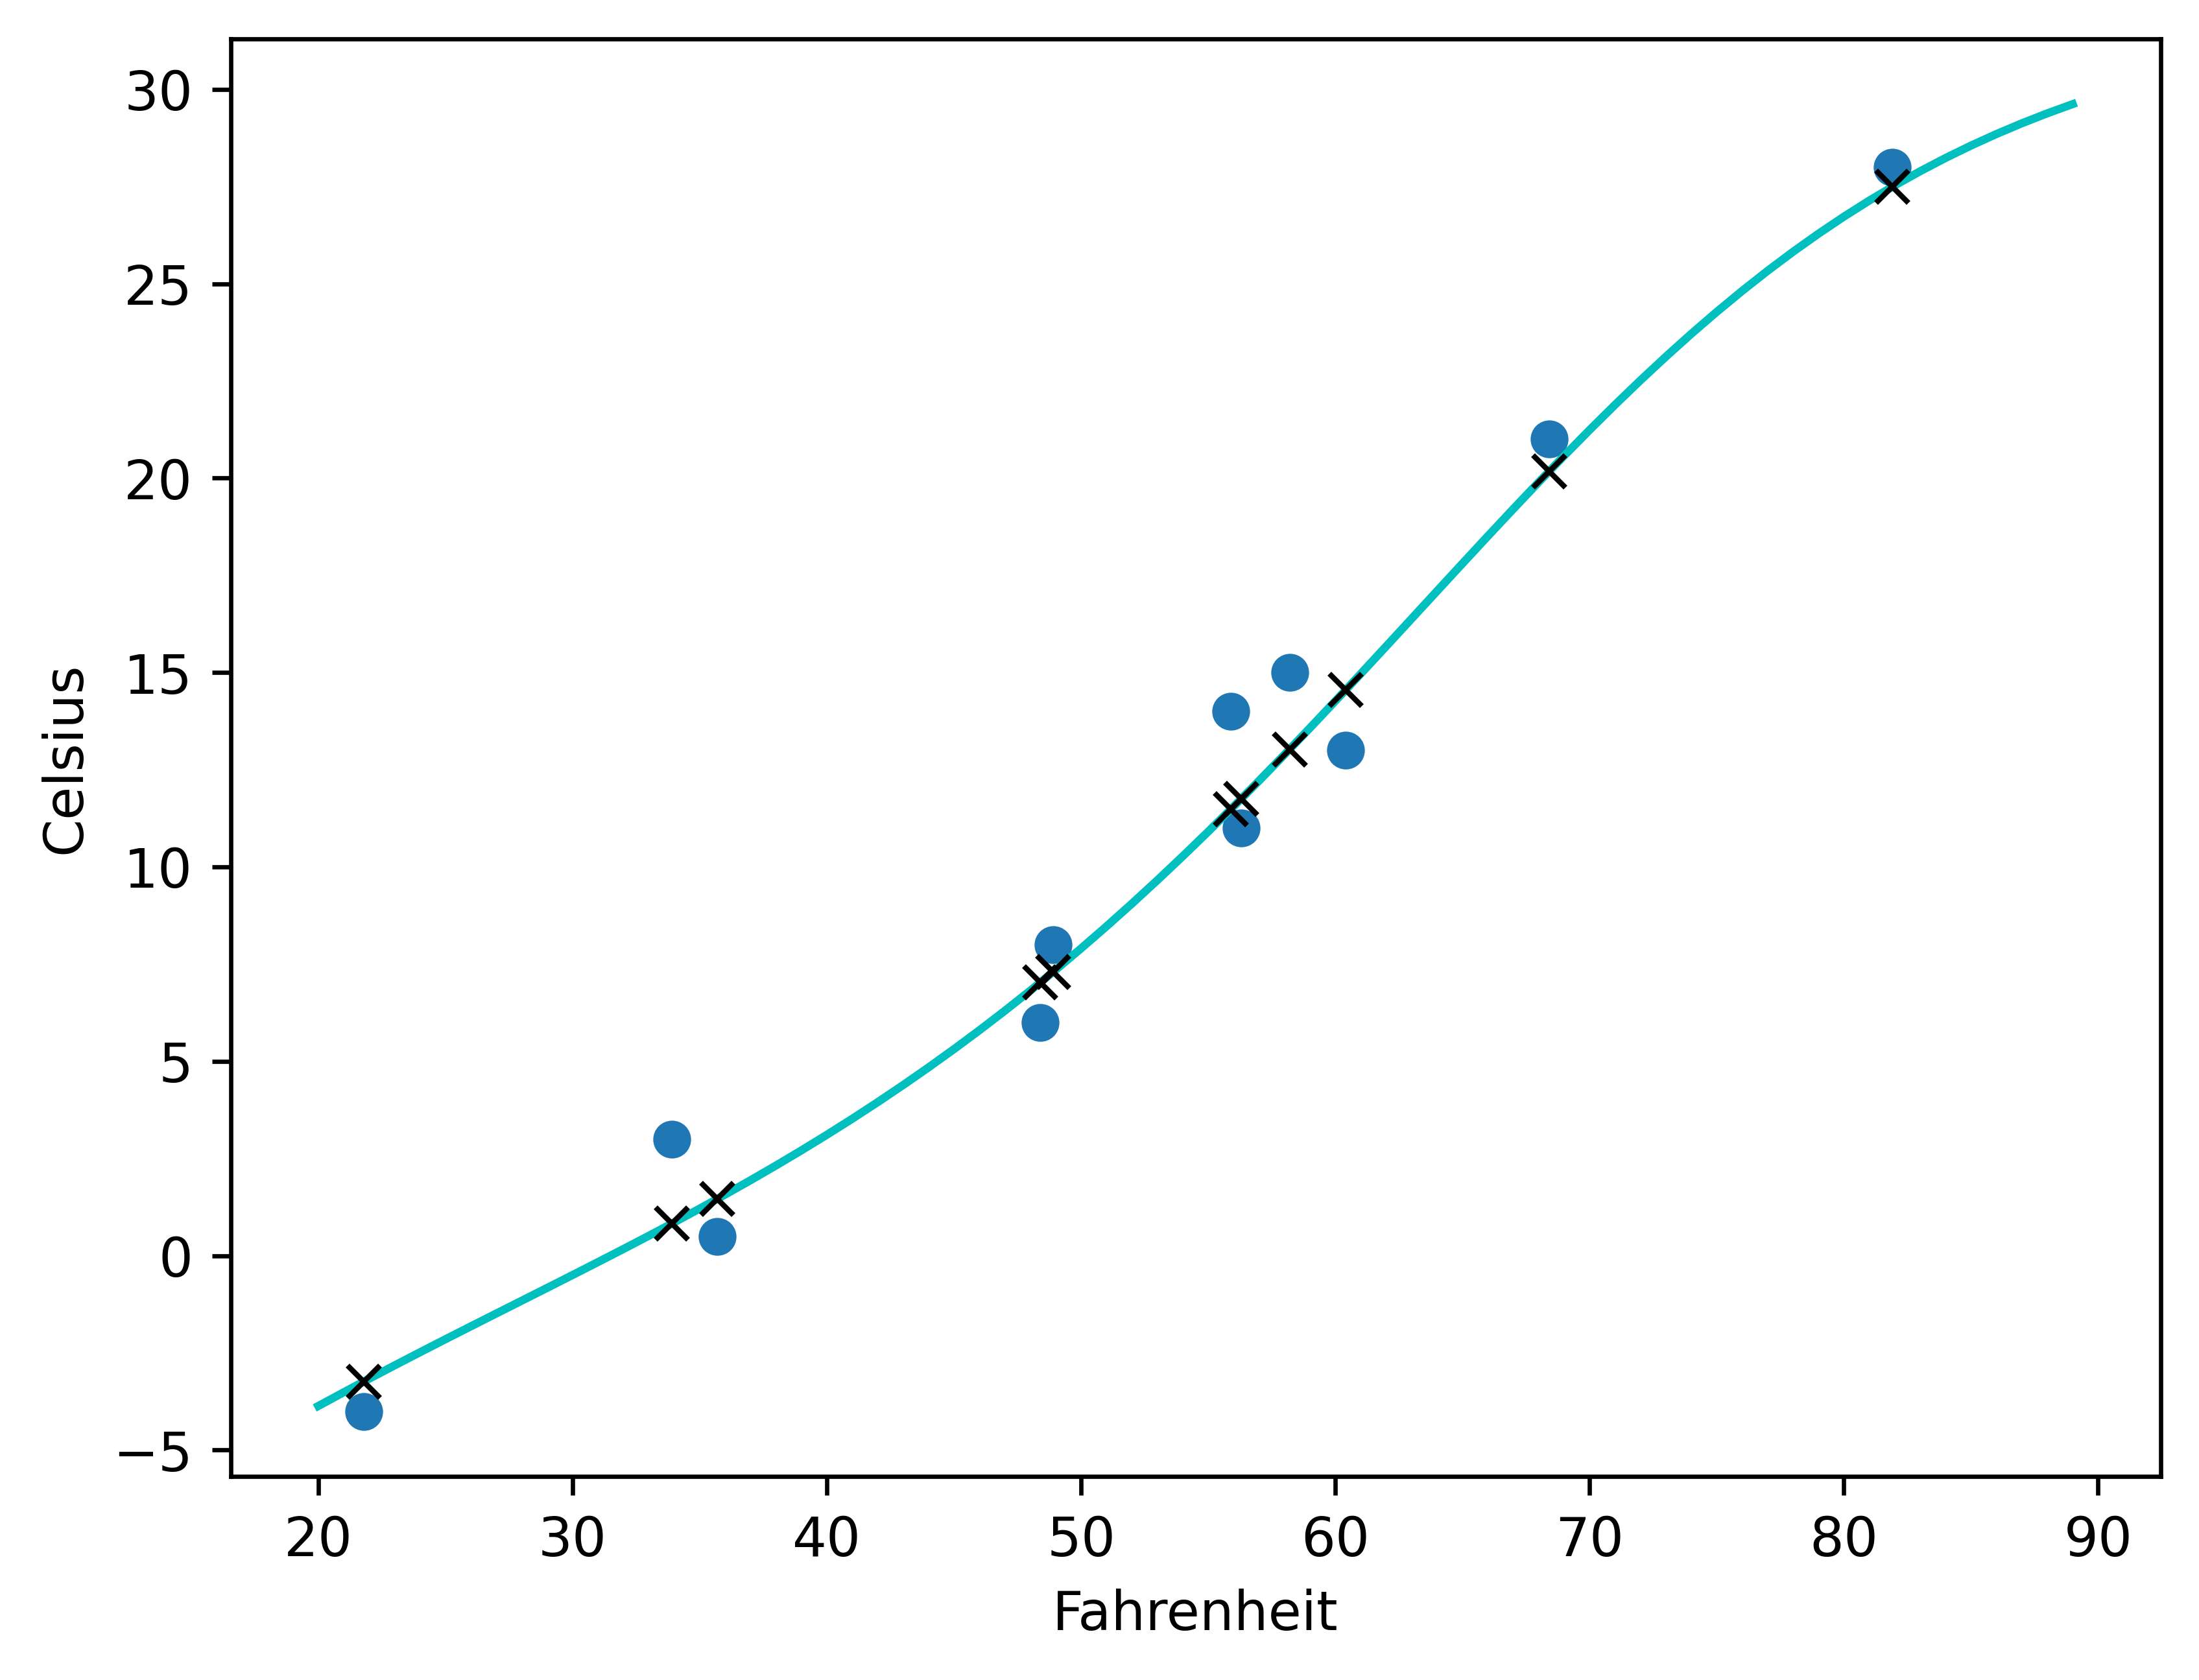

In [87]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 167.8257, Validation loss 336.7286
Epoch 1000, Training loss 63.5038, Validation loss 73.5848
Epoch 2000, Training loss 48.6092, Validation loss 55.4759
Epoch 3000, Training loss 29.4190, Validation loss 35.8588
Epoch 4000, Training loss 17.8738, Validation loss 21.8223
Epoch 5000, Training loss 11.3899, Validation loss 13.4272


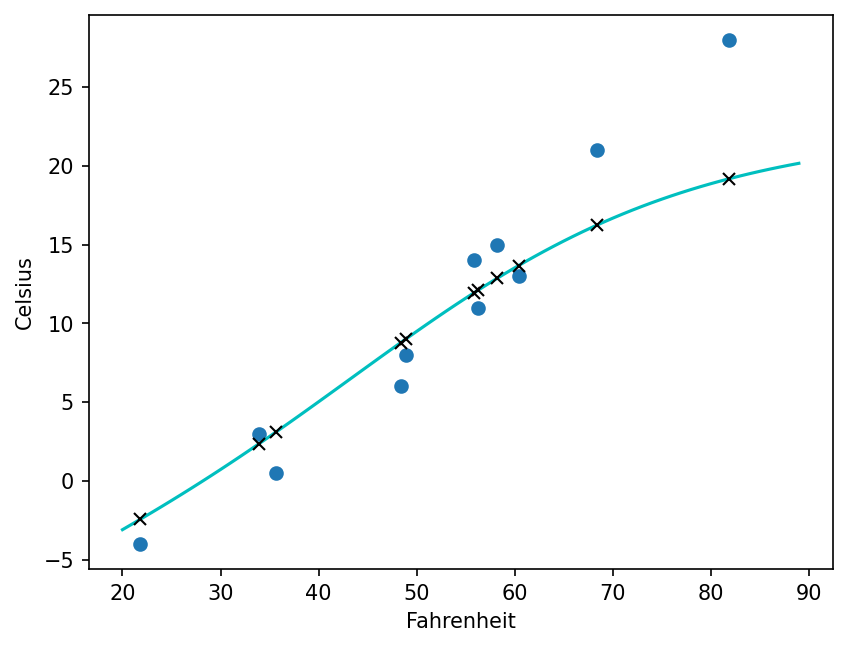

In [88]:
neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')